# Russian Sales Data 

## Data Discription

The following csv files consist of sales data, items sold, and item categories from {} stores in Russia. 

The purpose of exploring this data set is to find attributes that may affect the total sales of items and stores. 


### File descriptions

sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.

test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.

sample_submission.csv - a sample submission file in the correct format.

items.csv - supplemental information about the items/products.

item_categories.csv  - supplemental information about the items categories.

shops.csv- supplemental information about the shops.

### Data fields

ID - an Id that represents a (Shop, Item) tuple within the test set

shop_id - unique identifier of a shop

item_id - unique identifier of a product

item_category_id - unique identifier of item category

item_cnt_day - number of products sold. You are predicting a monthly amount of this measure

item_price - current price of an item

date - date in format dd/mm/yyyy

date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 
2015 is 33

item_name - name of item

shop_name - name of shop

item_category_name - name of item category

In [17]:
#import useful python modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from pandas.tseries import converter
converter.register()
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'pandas.tseries.converter.register' has been moved and renamed to 'pandas.plotting.register_matplotlib_converters'. 
  import sys


In [3]:
#import csv files into dataframes 
sales_train=pd.read_csv('sales_train.csv')
items=pd.read_csv('items.csv')
item_cat=pd.read_csv('item_categories.csv')
shops=pd.read_csv('shops.csv')

In [4]:
#quick view of each dataframe 
print(sales_train.head())
print(items.head())
print(item_cat.head())
print(shops.head())

         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
                                           item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
        item_category_name  item_

In [5]:
#after review, it would be useful to merge the sales_train and items dfs 
#merge sales_train and items dfs into one dataframe
df=pd.merge(sales_train, items, how='inner', on='item_id')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [6]:
#change values in date column from str to timestamp 
df['date']=pd.to_datetime(df['date'],dayfirst=True)

In [8]:
#add weekday, month, year and sales columns to help with data 
#exploration and vizualization 
date = df['date'].tolist()
weekday = [x.weekday() for x in date]
month = [x.month for x in date]
year = [x.year for x in date]
df['weekday'] = weekday
df['month'] = month
df['year'] = year
df['sales'] = df.item_price*df.item_cnt_day
#remove any negative sales from item_cnt_day
df = df[df.item_cnt_day>=0]
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,weekday,month,year,sales
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,2,1,2013,999.00
1,2013-01-23,0,24,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,2,1,2013,999.00
2,2013-01-20,0,27,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,6,1,2013,999.00
3,2013-01-02,0,25,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,2,1,2013,999.00
4,2013-01-03,0,25,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,3,1,2013,999.00
5,2013-01-20,0,25,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,6,1,2013,999.00
6,2013-01-23,0,25,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,2,1,2013,999.00
7,2013-01-26,0,25,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,5,1,2013,999.00
8,2013-01-27,0,6,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,6,1,2013,999.00
9,2013-01-10,0,15,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,3,1,2013,999.00


## Potential Attributes that may affect the total store/item sales 

- Seasonality 

- Item category 

- Store Variety (unique items sold within store) 

- Shop ID (in regards to sale of item) 

- Item price
 

In [9]:
#yearly sales by shop_id
shop_yearly_sales=df.groupby(['shop_id','year']).sum()
print(shop_yearly_sales)
shop_yearly_sales.groupby(['year'])['sales'].describe()

              date_block_num    item_id    item_price  item_cnt_day  \
shop_id year                                                          
0       2013            5064  104811661  5.553869e+06       11705.0   
1       2013            2984   60950373  2.926161e+06        6311.0   
2       2013           50270   72717743  1.032134e+07        9989.0   
        2014          179035   83280536  1.493348e+07       12247.0   
        2015          203231   65646918  9.704364e+06        8470.0   
3       2013           53320   84190900  7.331793e+06       10242.0   
        2014          170929   86364857  1.079431e+07       11039.0   
        2015          180380   58330706  8.127820e+06        7194.0   
4       2013           90079  148853533  1.330332e+07       19054.0   
        2014          238779  123118075  1.402430e+07       15909.0   
        2015          224204   78807345  7.833780e+06        9106.0   
5       2013           85622  133165128  9.181055e+06       14717.0   
      

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,52.0,2.348353e+07,1.817779e+07,380080.00,1.079288e+07,2.134337e+07,2.647680e+07,8.793015e+07
2014,53.0,2.549105e+07,1.874081e+07,2128062.18,1.584417e+07,2.189779e+07,2.824744e+07,8.914861e+07
2015,54.0,1.551272e+07,1.338728e+07,379461.00,7.924055e+06,1.284148e+07,1.812484e+07,6.086005e+07


count    1.050000e+02
mean     2.449685e+07
std      1.840285e+07
min      3.800800e+05
25%      1.318296e+07
50%      2.175986e+07
75%      2.775800e+07
max      8.914861e+07
Name: sales, dtype: float64


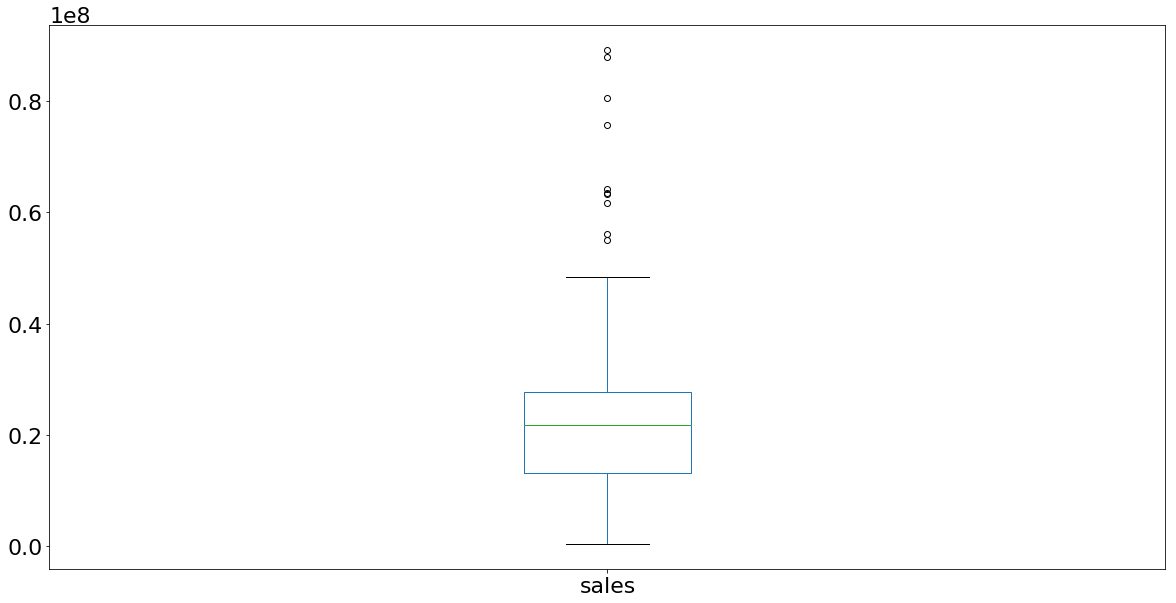

In [10]:
#since we do not have the complete sales data for 2015, we will get an average of 
#total store sales from years 2013 and 2014 
shop_yearly_sales.query('year == 2013 or year == 2014')['sales'].plot(kind ='box')
print(shop_yearly_sales.query('year == 2013 or year == 2014')['sales'].describe())

In [11]:
#from the dataset and boxplot above, we see that the majority of stores have total sales between 28,000,000 and 
#13,000,000
#therefore, moving foward, we will only look at stores within the referenced range
#below is the list of stores within that range 
store_list = shop_yearly_sales.query('year == 2013 or year == 2014').query('13000000 <= sales <= 28000000')

#find which stores sold items in both 2013 and 2014 
_2013 = store_list.query('year == 2013').index.get_level_values(0)
_2014 = store_list.query('year == 2014').index.get_level_values(0)

state = []
states = []
for i in _2013:
    state.append(i not in _2014)
for i in _2014:
    states.append(i not in _2013)
    
stores = list(_2013[state])
storess = list(_2014[states]) 

#create dataframe consisting of stores who sold items in both 2014 and 2013 
store_list = store_list.drop(stores, axis=0)
store_list = store_list.drop(storess, axis=0)
store_list

date_block_num    item_id    item_price  item_cnt_day  \
shop_id year                                                          
2       2013           50270   72717743  1.032134e+07        9989.0   
        2014          179035   83280536  1.493348e+07       12247.0   
4       2013           90079  148853533  1.330332e+07       19054.0   
        2014          238779  123118075  1.402430e+07       15909.0   
7       2013          138191  236498690  1.922418e+07       28218.0   
        2014          367622  199780518  2.232456e+07       24530.0   
14      2013           83992  146620590  1.217726e+07       20114.0   
        2014          217990  109668669  1.397012e+07       16003.0   
15      2013          150961  258422820  1.960065e+07       32339.0   
        2014          358367  194319754  2.118359e+07       24854.0   
16      2013          130830  263991807  1.813442e+07       30250.0   
        2014          290239  157267084  1.808968e+07       19569.0   
19      2013          154783  279119786  1.965611e+07       32860.0   
        2014          384505  213063196  2.074273e+07       25353.0   
21      2013          128296  233370518  1.448857e+07       25258.0   
        2014          377523  226718441  2.038614e+07       25168.0   
22      2013          108068  187553224  1.584270e+07       26943.0   
        2014          270083  150013360  1.590513e+07       20341.0   
24      2013          142429  214137211  2.041164e+07       27983.0   
        2014          332964  173461805  2.221685e+07       23402.0   
26      2013          134132  246344798  1.796214e+07       31277.0   
        2014          320039  181219242  1.798611e+07       23182.0   
29      2013          133938  259545383  1.972618e+07       31014.0   
        2014          319606  180057089  1.892841e+07       21656.0   
30      2013          152967  293699395  1.833339e+07       33577.0   
        2014          353252  213081470  1.791536e+07       24796.0   
37      2013           87276  182996353  1.344952e+07       21706.0   
        2014          216615  116728264  1.353210e+07       14558.0   
38      2013           98621  156434596  1.676535e+07       20653.0   
        2014          294955  147390155  2.076179e+07       19646.0   
41      2013          120125  202691114  1.668920e+07       24729.0   
        2014          234441  131958936  1.352983e+07       16176.0   
45      2013           93898  164217834  1.323511e+07       19652.0   
        2014          214462  118330791  1.318708e+07       14818.0   
52      2013          106223  181893615  1.317886e+07       22130.0   
        2014          269992  149147088  1.540999e+07       17603.0   
53      2013          125814  199143827  1.706058e+07       26054.0   
        2014          339079  176986881  1.962339e+07       22801.0   
56      2013          168978  336912590  1.905868e+07       34690.0   
        2014          439227  274899888  1.982422e+07       28356.0   
59      2013          106909  187677301  1.416662e+07       22365.0   
        2014          244723  137071849  1.429498e+07       16249.0   

              item_category_id  weekday   month         sales  
shop_id year                                                   
2       2013            281800    29703   59031  1.318296e+07  
        2014            323184    33936   69057  1.909542e+07  
4       2013            613194    55793  106720  1.592225e+07  
        2014            503295    45469   89938  1.590347e+07  
7       2013            903938    82723  162579  2.387673e+07  
        2014            784203    71321  137073  2.656249e+07  
14      2013            625410    55774  100148  1.620718e+07  
        2014            456686    41982   82943  1.827954e+07  
15      2013           1002421    89767  177796  2.505455e+07  
        2014            764566    69111  131921  2.630058e+07  
16      2013           1038861    91727  156583  2.191812e+07  
        2014            623978    57334  109278  2.149076

In [80]:
#index of stores we will use moving forward
store_list_index = list(store_list.index.get_level_values(0).unique())

## Questions 1: Do the Shops themselves affect item sales? 

Lets look at the top performing categories to see if there is a correlation between item sales and shop id.

First we will create a dataframe that consist of item_category_id sales from 2013 and 2014 sorted by descending sale values.  

Then we will create a dataframe that consist of the store total sales from 2013 and 2014 sorted by descending sale values

From there, we will see if the stores with higher sales contribute more sales to the high selling products. If so, we can conclude that the Shops themesevles affect the item sales. 

In [13]:
#create a dataframe consisting of only stores within range and 
#sales data from years 2013 and 2014
cat_df=df[df.shop_id.isin(store_list_index)].query('year == 2013 or year == 2014')
cat_df
#create df that consists of the total sum of store sales of each category (2013 and 2014 combined)
cat_sum=cat_df.groupby(['item_category_id', 'shop_id']).sum()
#create df that consists of the sum of sale of each store (2013 and 2014 combined)
store_sales_sum=cat_df.groupby(['shop_id'])['sales'].sum().sort_values(ascending=False)

#create dfs that consists of units sold by store and by category 
cat_unit_sum=cat_df.groupby(['item_category_id','shop_id'])['item_cnt_day'].sum()
store_units_sum=cat_df.groupby(['shop_id']).sum()

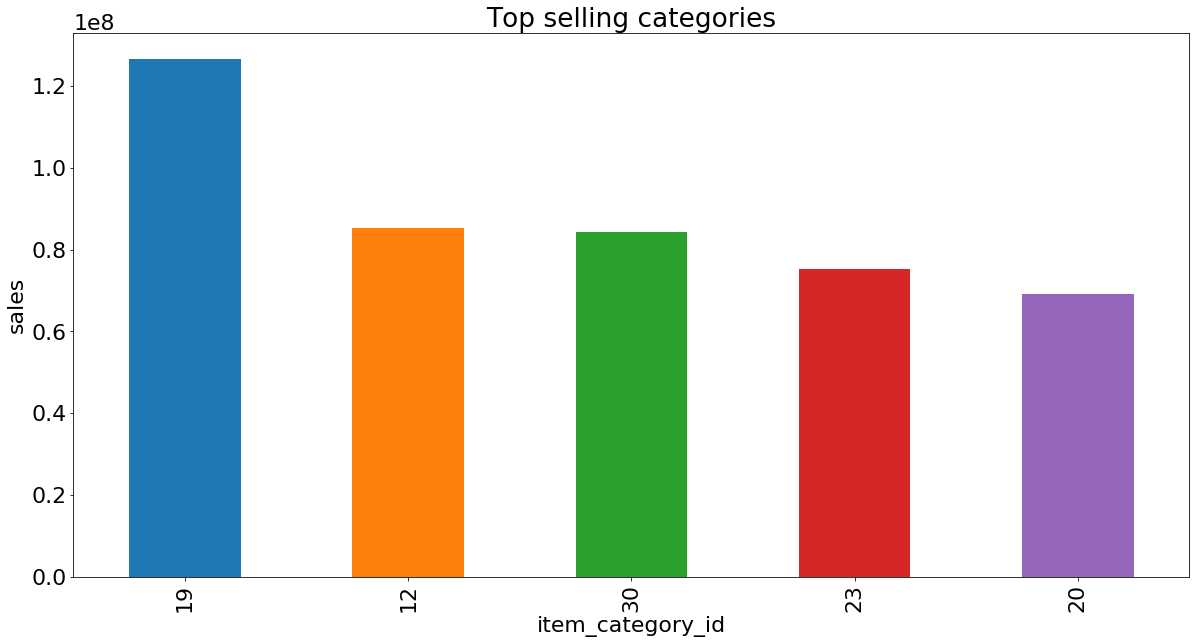

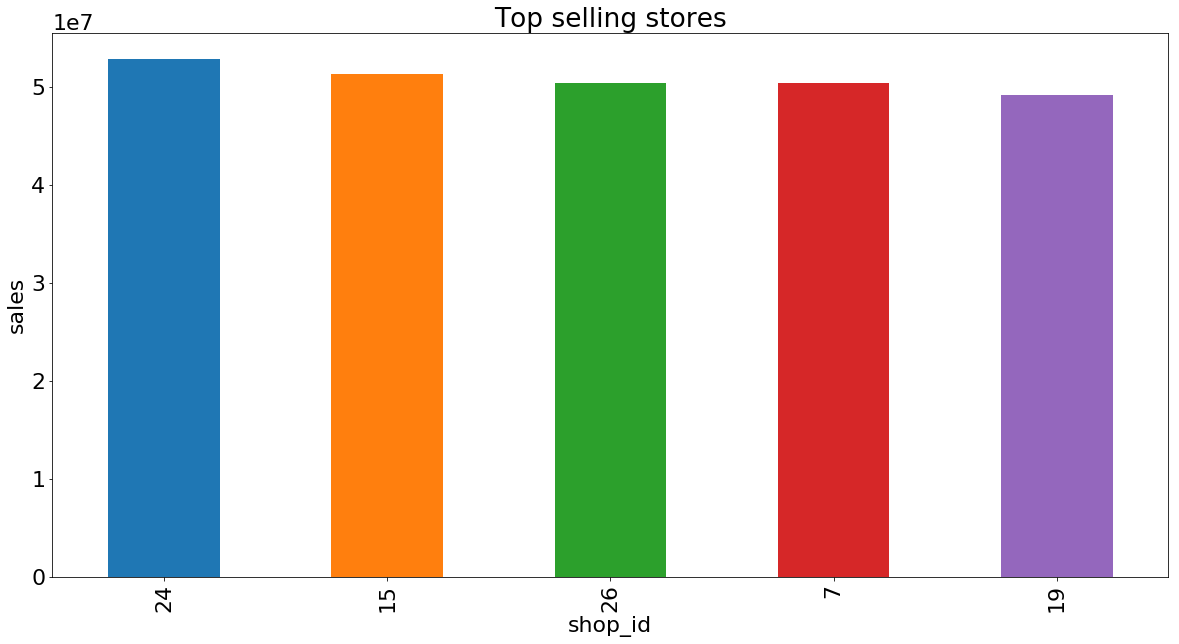

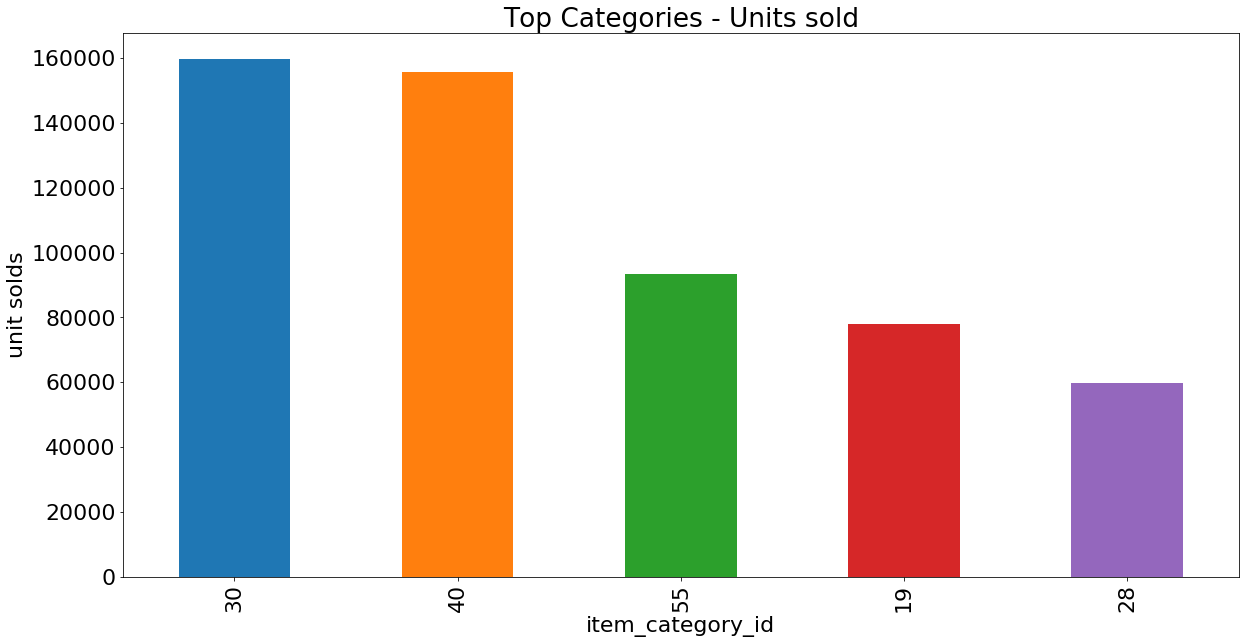

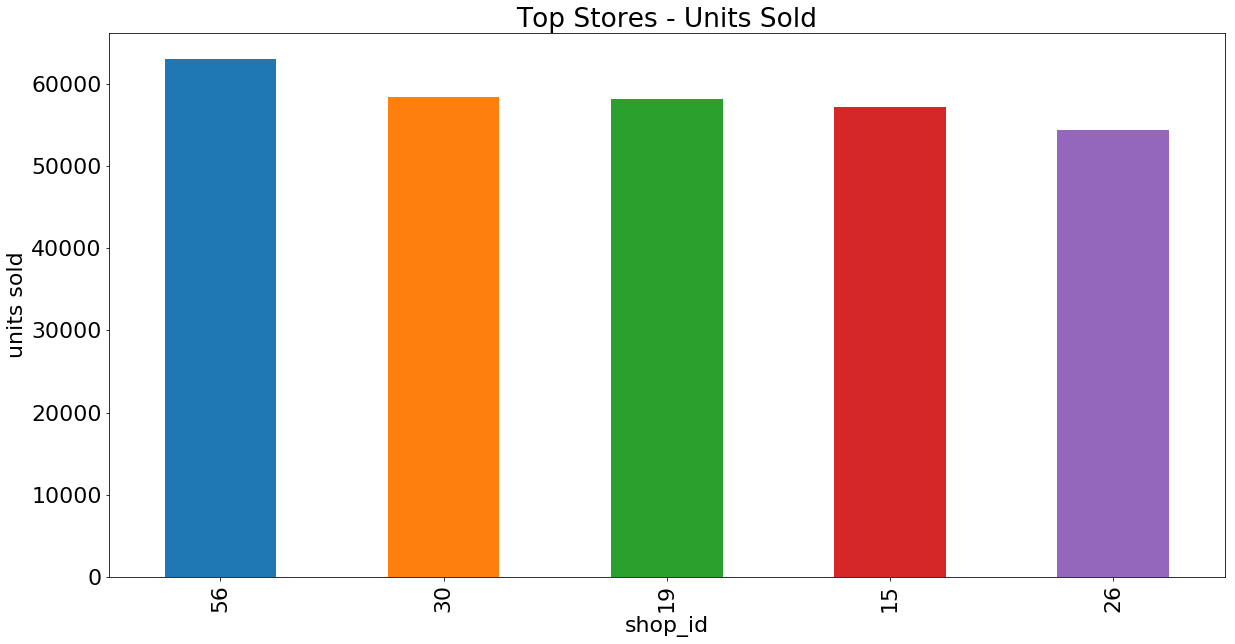

In [14]:
#bar chart of top performing categories in regards to sales
cat_sum.groupby(['item_category_id'])['sales'].sum().sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.ylabel('sales')
plt.title('Top selling categories')
plt.show()
#bar chart of top performing stores in regards to sales 
store_sales_sum.iloc[:5].plot(kind='bar')
plt.ylabel('sales')
plt.title('Top selling stores')
plt.show()
store_sales_sum.count()

#bar chart of top performing categories in regards to units sold 
cat_unit_sum.groupby(['item_category_id']).sum().sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.ylabel('unit solds')
plt.title('Top Categories - Units sold')
plt.show()
#bar chart of top performing stores in regards to units sold 
store_units_sum['item_cnt_day'].sort_values(ascending=False).iloc[:5].plot(kind='bar')
plt.ylabel('units sold')
plt.title('Top Stores - Units Sold')
plt.show()

In [15]:
top_stores=[24, 15, 26, 7, 19]

def pie_data(i):
    x = cat_sum.loc[cat_sum.index.isin(top_stores,level=1)].loc[i]['sales'].sum()
    y = cat_sum.loc[np.logical_not(cat_sum.index.isin(top_stores,level=1))].loc[i]['sales'].sum()
    return [x,y]

cat_19 = pie_data(19)
cat_12 = pie_data(12)
cat_30 = pie_data(30)

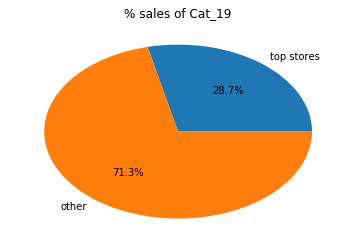

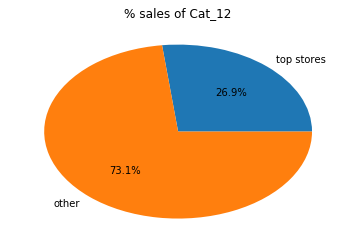

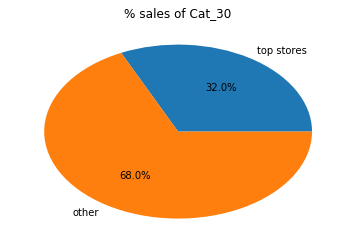

In [98]:
labels = ['top stores','other']
          
plt.pie(cat_19, labels=labels,autopct='%1.1f%%')
plt.title('% sales of Cat_19')
plt.show()

plt.pie(cat_12, labels=labels,autopct='%1.1f%%')
plt.title('% sales of Cat_12')
plt.show()

plt.pie(cat_30, labels=labels,autopct='%1.1f%%')
plt.title('% sales of Cat_30')
plt.show()

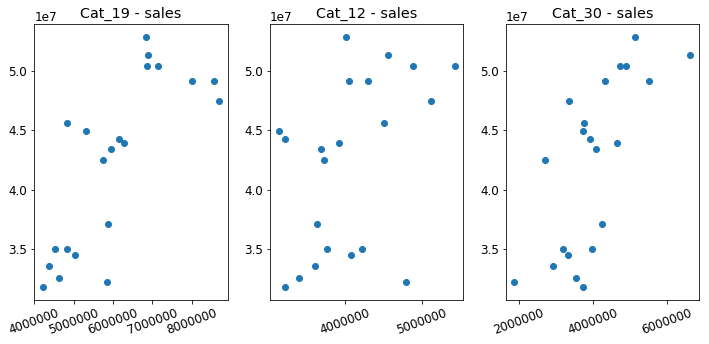

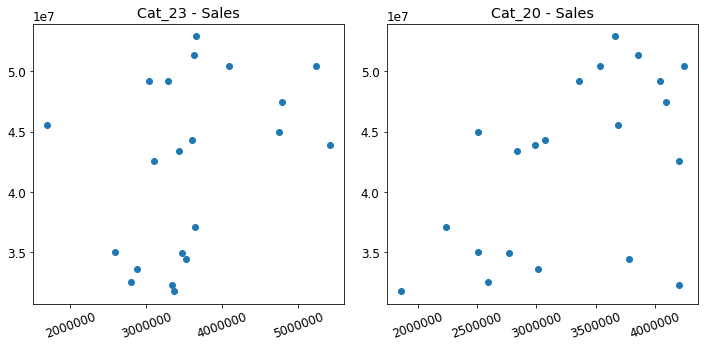

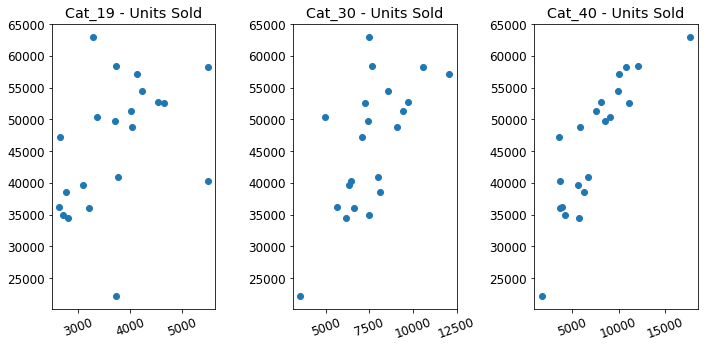

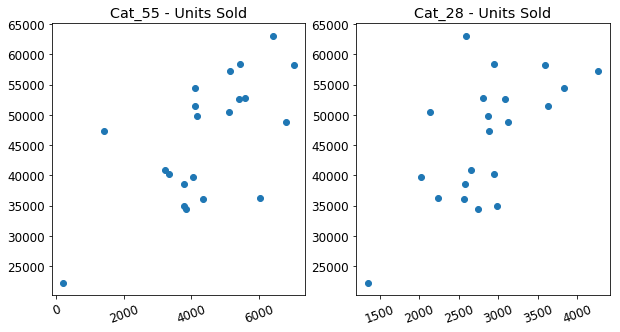

In [18]:
#scatter plots of store total sales vs. catogory sale within store for top 5 categories 

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.scatter(x=cat_sum.loc[19]['sales'],y=store_sales_sum.sort_index())
plt.title('Cat_19 - sales')
plt.xticks(rotation=20)

plt.subplot(1,3,2)
plt.scatter(x=cat_sum.loc[12]['sales'],y=store_sales_sum.sort_index())
plt.title('Cat_12 - sales')
plt.xticks(rotation=20)

plt.subplot(1,3,3)
plt.scatter(x=cat_sum.loc[30]['sales'],y=store_sales_sum.sort_index())
plt.title('Cat_30 - sales')
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x=cat_sum.loc[23]['sales'],y=store_sales_sum.sort_index())
plt.title('Cat_23 - Sales')
plt.xticks(rotation=20)

plt.subplot(1,2,2)
plt.scatter(x=cat_sum.loc[20]['sales'],y=store_sales_sum.sort_index())
plt.title('Cat_20 - Sales')
plt.xticks(rotation=20)

plt.tight_layout()
plt.show()

#Scatter plots of store total units sold vs. catogory units sold within store for top 5 catogories 

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
plt.scatter(x=cat_unit_sum.loc[19],y=store_units_sum['item_cnt_day'].sort_index())
plt.title('Cat_19 - Units Sold')
plt.xticks(rotation=20)

plt.subplot(1,3,2)
plt.scatter(x=cat_unit_sum.loc[30],y=store_units_sum['item_cnt_day'].sort_index())
plt.title('Cat_30 - Units Sold')
plt.xticks(rotation=20)

plt.subplot(1,3,3)
plt.scatter(x=cat_unit_sum.loc[40],y=store_units_sum['item_cnt_day'].sort_index())
plt.title('Cat_40 - Units Sold')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x=cat_unit_sum.loc[55],y=store_units_sum['item_cnt_day'].sort_index())
plt.title('Cat_55 - Units Sold')
plt.xticks(rotation=20)

plt.subplot(1,2,2)
plt.scatter(x=cat_unit_sum.loc[28],y=store_units_sum['item_cnt_day'].sort_index())
plt.title('Cat_28 - Units Sold')
plt.xticks(rotation=20)

plt.show()

In [19]:
#Sales Correlation for Cat_19
print(np.corrcoef(x=cat_sum.loc[19]['sales'], y=store_sales_sum.sort_index()))
#Sales Correlation for Cat_12
print(np.corrcoef(x=cat_sum.loc[12]['sales'], y=store_sales_sum.sort_index()))
#Sales Correlation for Cat_30
print(np.corrcoef(x=cat_sum.loc[30]['sales'], y=store_sales_sum.sort_index()))
#Sales Correlation for Cat_23
print(np.corrcoef(x=cat_sum.loc[23]['sales'], y=store_sales_sum.sort_index()))
#Sales Correlation for Cat_20 
print(np.corrcoef(x=cat_sum.loc[20]['sales'], y=store_sales_sum.sort_index()))

[[1.         0.77029174]
 [0.77029174 1.        ]]
[[1.         0.43719825]
 [0.43719825 1.        ]]
[[1.         0.70183589]
 [0.70183589 1.        ]]
[[1.         0.35578412]
 [0.35578412 1.        ]]
[[1.         0.50974843]
 [0.50974843 1.        ]]


In [20]:
#Unit sales Correlation for Cat_19
print(np.corrcoef(x=cat_unit_sum.loc[19],y=store_units_sum['item_cnt_day'].sort_index()))
#Unit sales Correlation for Cat_12
print(np.corrcoef(x=cat_unit_sum.loc[30],y=store_units_sum['item_cnt_day'].sort_index()))
#Unit Sales Correlation for Cat_30
print(np.corrcoef(x=cat_unit_sum.loc[40],y=store_units_sum['item_cnt_day'].sort_index()))
#Unit Sales Correlation for Cat_23
print(np.corrcoef(x=cat_unit_sum.loc[55],y=store_units_sum['item_cnt_day'].sort_index()))
#Unit Sales Correlation for Cat_20 
print(np.corrcoef(x=cat_unit_sum.loc[28],y=store_units_sum['item_cnt_day'].sort_index()))

[[1.         0.41488049]
 [0.41488049 1.        ]]
[[1.         0.65205135]
 [0.65205135 1.        ]]
[[1.         0.86301327]
 [0.86301327 1.        ]]
[[1.         0.64662353]
 [0.64662353 1.        ]]
[[1.         0.63819177]
 [0.63819177 1.        ]]


## Question 1 Conclusion:

As you can see from the scatter plots and the correlation coefficients, stores will have an affect on some categories, but not all. Stores with higher sales specialize 

Futher research: I would suggest looking into each store to see what categories they sale. If the store specializes within a certain genre (i.e. electronics), you would expect for that store to sell more items within electronic specialized categories. 

## Question 2: Are you able to predict item unit sale counts from category sales, i.e., the higher the sales for a category, the more units sold within the category? 



count    6.700000e+01
mean     1.324549e+07
std      2.416582e+07
min      2.240000e+01
25%      4.863809e+05
50%      3.609079e+06
75%      1.098799e+07
max      1.266402e+08
Name: sales, dtype: float64

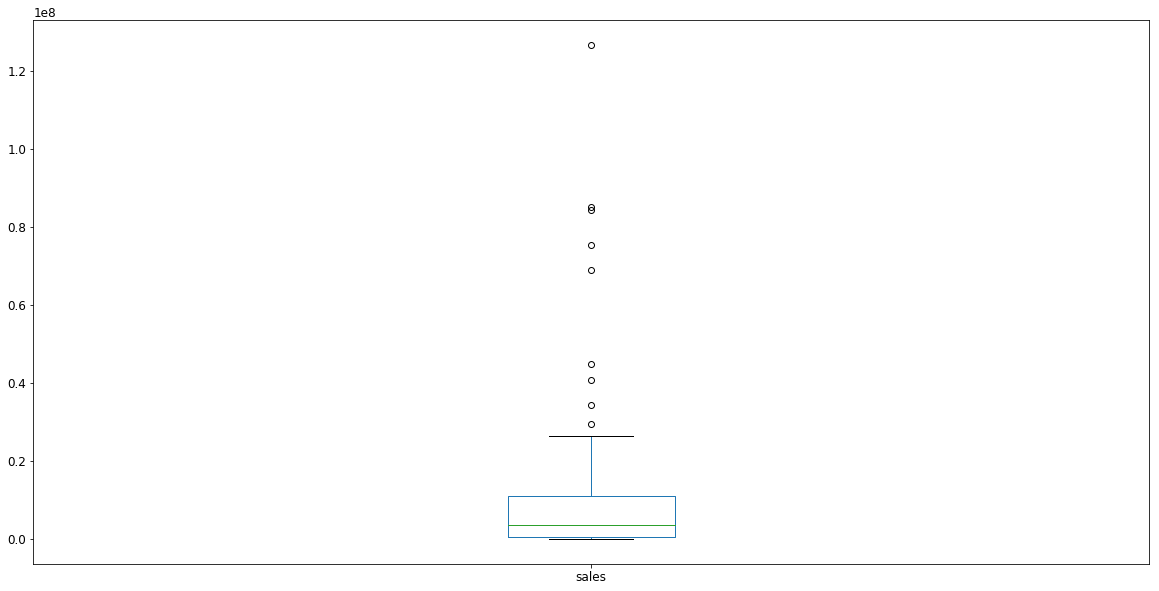

In [21]:
#create dataframes for category sales and category units sold 
cat_sales = cat_df.groupby('item_category_id')['sales'].sum()
cat_units_sold = cat_df.groupby('item_category_id')['item_cnt_day'].sum()

#create boxplot and describe for total category sales to see if there are outliers 
cat_sales.plot(kind='box')
cat_sales.describe()

In [22]:
#create new dataframes to adjust for outliers 
cat_sales = cat_df.groupby('item_category_id').sum()
cat_sales = cat_sales.query('486000 < sales < 11000000')['sales']

cat_sales_index = list(cat_sales.index)
cat_units_sold = cat_units_sold[cat_units_sold.index.isin(cat_sales_index)]

[[1.         0.45654275]
 [0.45654275 1.        ]]


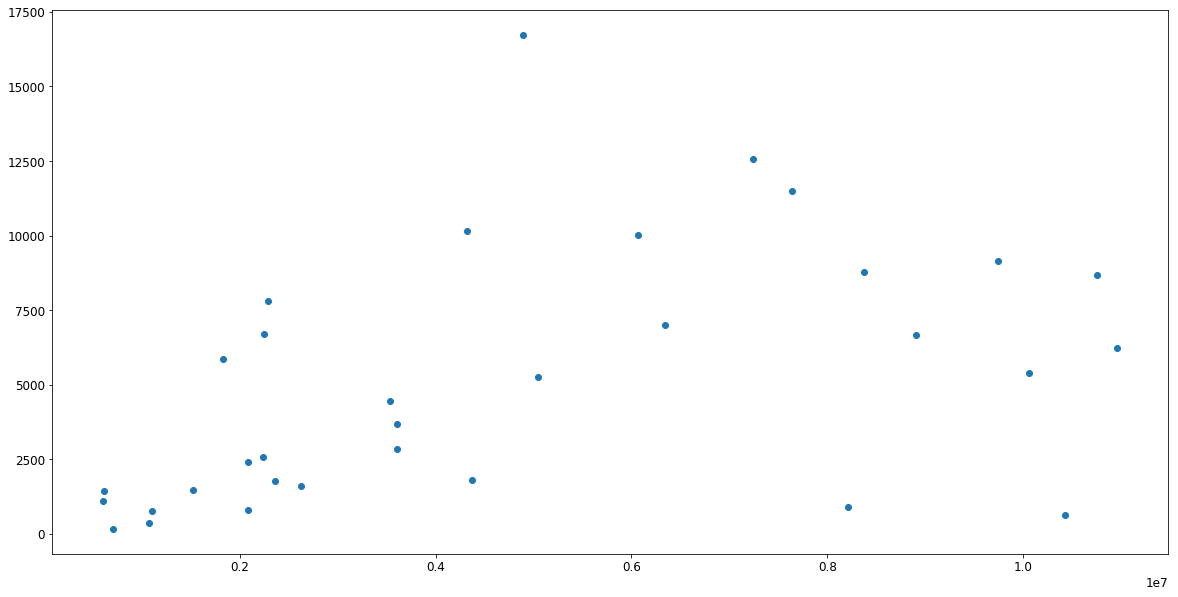

In [23]:
#create scatter plot comparing sales to units sold 
plt.scatter(x=cat_sales,
            y=cat_units_sold)
print(np.corrcoef(x=cat_sales,
            y=cat_units_sold))

## Question 2 analysis

Overall, there is a weak correlation between category units sold and category sales.  

## Question 3: Is there a correlation between price range and amount of units sold (dis-regarding item category)?

To check this, we will first develop a dataframe of items that are sold in all referenced stores in 2014. 

Next, we will create a dataframe that provides the sum of the units sold and the average price of the item. We will only pick items that were not discounted throughout the year. We will also create a boxplot to see if there are any price outliers.  

From there, we will be able to create bar-charts comparing various items and there units sold.  

In [102]:
#create dataframe grouped by 'item_id' to get count of stores in 2014
store_count = cat_df.query('year==2014').groupby(['item_id','shop_id']).count()

#iterate through dataframe to find items that were sold in all stores 
store_count_index = list(store_count.index.get_level_values(level=0).unique())
items_to_view = []
for i in store_count_index:
    if list(store_count.loc[i].index) == store_list_index:
        items_to_view.append(i)
items_to_view        

[31,
 32,
 77,
 482,
 485,
 486,
 687,
 791,
 935,
 949,
 950,
 951,
 981,
 1075,
 1077,
 1099,
 1249,
 1306,
 1364,
 1377,
 1384,
 1387,
 1388,
 1389,
 1406,
 1407,
 1439,
 1441,
 1449,
 1459,
 1460,
 1467,
 1471,
 1479,
 1480,
 1483,
 1485,
 1495,
 1496,
 1497,
 1501,
 1511,
 1512,
 1513,
 1523,
 1527,
 1542,
 1548,
 1555,
 1556,
 1564,
 1565,
 1569,
 1673,
 1809,
 1811,
 1823,
 1824,
 1825,
 1826,
 1830,
 1832,
 1834,
 1851,
 1853,
 1855,
 1856,
 1857,
 1858,
 1865,
 1905,
 1915,
 1916,
 1921,
 1937,
 1988,
 2032,
 2047,
 2196,
 2252,
 2254,
 2263,
 2267,
 2268,
 2269,
 2270,
 2279,
 2283,
 2285,
 2288,
 2293,
 2294,
 2295,
 2307,
 2308,
 2309,
 2316,
 2341,
 2354,
 2355,
 2407,
 2416,
 2429,
 2430,
 2445,
 2446,
 2447,
 2578,
 2678,
 2685,
 2687,
 2689,
 2690,
 2703,
 2733,
 2743,
 2744,
 2753,
 2754,
 2766,
 2768,
 2779,
 2780,
 2799,
 2800,
 2806,
 2808,
 2809,
 2813,
 2814,
 2815,
 2816,
 2817,
 2818,
 2830,
 2831,
 2833,
 2854,
 2921,
 2934,
 2939,
 2946,
 2956,
 2964,
 2969,
 

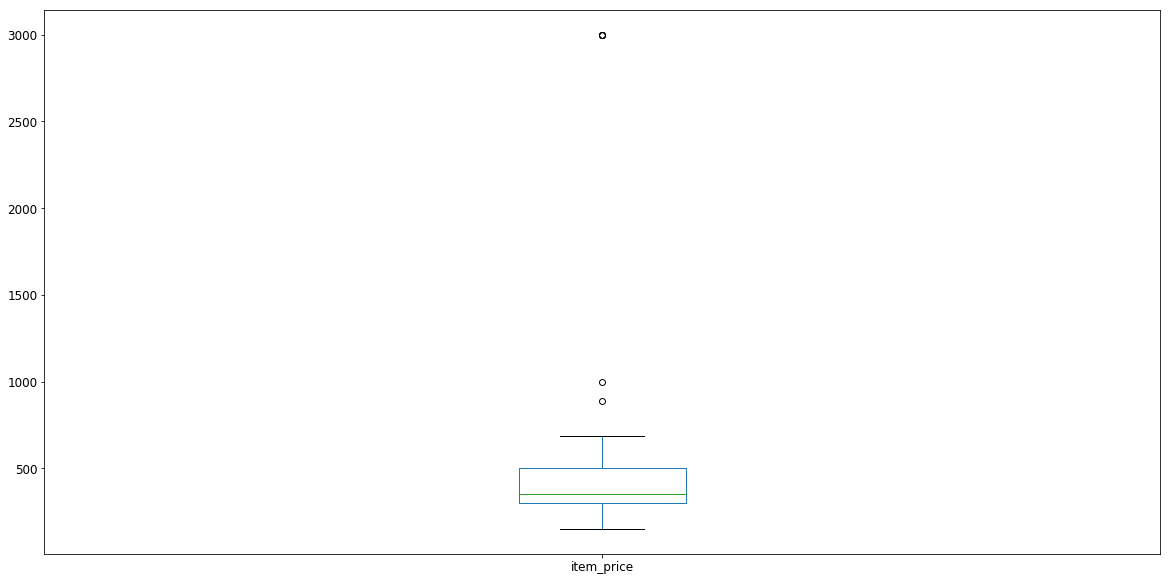

count      38.000000
mean      657.736842
std       833.229201
min       149.000000
25%       299.000000
50%       349.000000
75%       500.000000
max      2999.000000
Name: item_price, dtype: float64


In [130]:
#create dataframe of items that were sold in all stores 
item_price_mean = cat_df[cat_df.item_id.isin(items_to_view)].groupby('item_id').mean()
#query dataframe above to only include items that did not go on sale(discount) during the year 
price_no_sales = item_price_mean[item_price_mean.item_price % 1 == 0]
#boxplot and describe to remove outliers 
price_no_sales.item_price.plot(kind='box')
plt.show()
print(price_no_sales.item_price.describe())

In [149]:
price_no_sales = price_no_sales.query('299 <= item_price <= 500')
#create new list to query items we will use moving forward
items_to_view = list(price_no_sales.index)
item_unit_sold=cat_df[cat_df.item_id.isin(items_to_view)].groupby('item_id').sum()
item_unit_sold.sort_index(inplace=True)
price_no_sales.sort_index(inplace=True)
price_no_sales['units_sold'] = item_unit_sold.item_cnt_day
price_no_sales.units_sold.describe()

count     23.000000
mean     246.347826
std      184.505878
min       72.000000
25%      114.500000
50%      175.000000
75%      325.000000
max      781.000000
Name: units_sold, dtype: float64

In [153]:
price_no_sales.query('114 <= units_sold <= 325')

,date_block_num,shop_id,item_price,item_cnt_day,item_category_id,weekday,month,year,sales,units_sold
item_id,,,,,,,,,,
2196,18.982659,29.936416,299.0,1.011561,55.0,3.497110,7.982659,2014.000000,302.456647,175.0
3929,13.360656,27.191257,299.0,1.322404,20.0,3.519126,2.360656,2014.000000,395.398907,242.0
4628,17.074380,30.942149,299.0,1.057851,55.0,3.438017,6.074380,2014.000000,316.297521,128.0
5012,19.675676,29.171171,399.0,1.054054,40.0,3.324324,8.675676,2014.000000,420.567568,117.0
5319,22.724299,29.056075,299.0,1.495327,55.0,3.495327,11.724299,2014.000000,447.102804,320.0
5444,14.209150,28.516340,299.0,1.006536,55.0,3.496732,6.816993,2013.699346,300.954248,154.0
6847,17.901099,32.390110,299.0,1.032967,55.0,3.439560,6.901099,2014.000000,308.857143,188.0
7530,13.603053,30.541985,399.0,1.106870,40.0,3.923664,2.603053,2014.000000,441.641221,145.0
8415,15.573529,32.794118,349.0,1.156863,40.0,3.411765,4.573529,2014.000000,403.745098,236.0


In [187]:
#Need help with questions 3

## Question 4: Seasonality - Are there times in the year where sales increase and if so? Are they predictable? 

First, we will create a dataframe that sum all store sales by months. With this data, we will create a line graph. 

From the line graph, we will be able to determine if there are months where sales increase dramatically, and if so, we can compare those months' sales vs. the other months sales. 

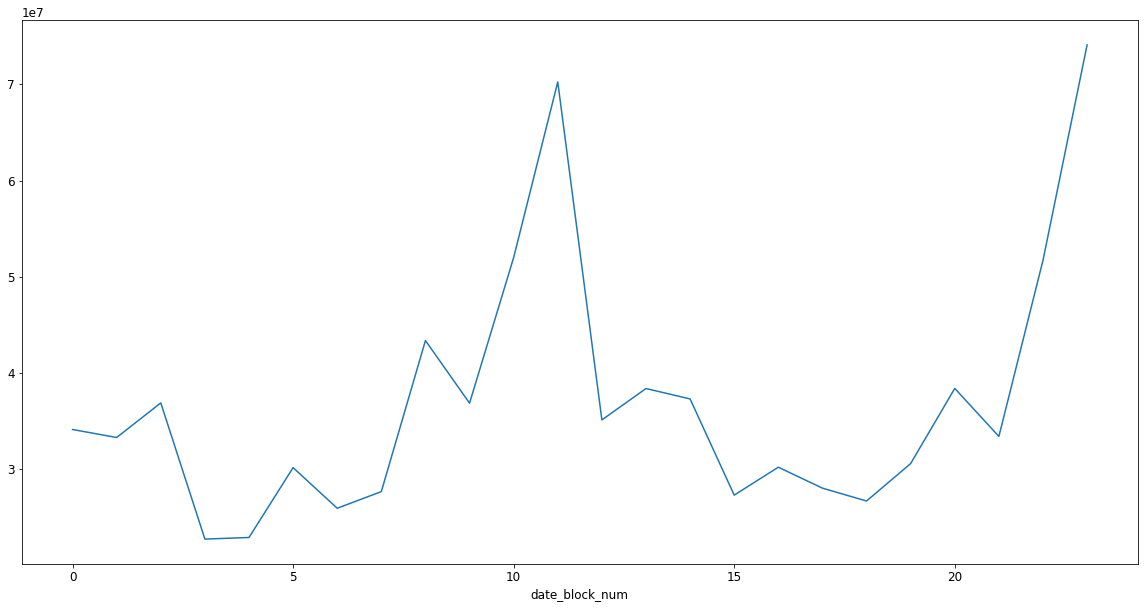

date_block_num
0     3.412651e+07
1     3.329290e+07
2     3.688851e+07
3     2.273296e+07
4     2.290005e+07
5     3.016269e+07
6     2.593835e+07
7     2.767004e+07
8     4.337535e+07
9     3.686296e+07
10    5.200395e+07
11    7.025926e+07
12    3.512063e+07
13    3.838416e+07
14    3.730176e+07
15    2.730237e+07
16    3.020585e+07
17    2.802827e+07
18    2.669116e+07
19    3.058494e+07
20    3.839460e+07
21    3.340407e+07
22    5.171166e+07
23    7.410501e+07
Name: sales, dtype: float64

In [159]:
monthly_sales = cat_df.groupby('date_block_num')['sales'].sum()

monthly_sales.plot()
plt.show()
monthly_sales

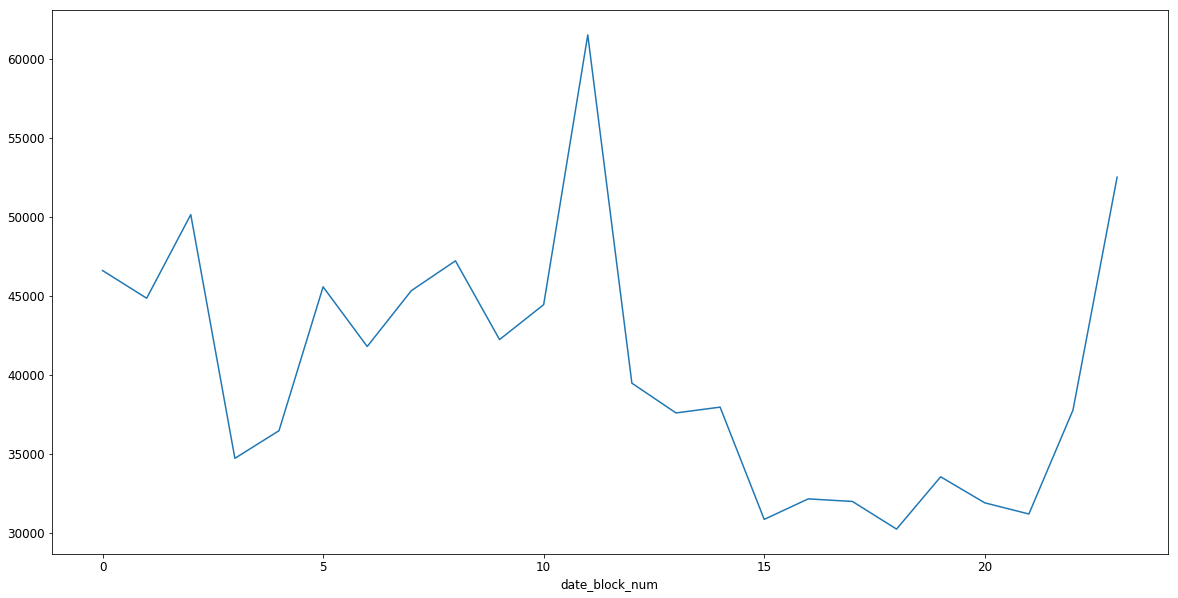

date_block_num
0     46599.0
1     44848.0
2     50137.0
3     34722.0
4     36469.0
5     45568.0
6     41794.0
7     45326.0
8     47214.0
9     42233.0
10    44441.0
11    61504.0
12    39475.0
13    37592.0
14    37960.0
15    30859.0
16    32157.0
17    31992.0
18    30245.0
19    33552.0
20    31906.0
21    31200.0
22    37774.0
23    52505.0
Name: item_cnt_day, dtype: float64

In [162]:
#looks like date_block_num's 10, 11, 22 and 23 are higher sales months compared to the rest of the year. 

monthly_units = cat_df.groupby('date_block_num')['item_cnt_day'].sum()
monthly_units.plot()
plt.show()

monthly_units

## Question 4: conclusion

Comparing the two graphs, I would say that in general you will be able to predict units sold by seasons. 


## Question 5: Does a store sales depend on how many unique items it sells? 

First, we will create a dataframe that list the amount of unique items the store sales. 

From there, we will compare the unique item count to store sales. 



In [182]:
#create dataframe grouped by 'shop_id' and 'item_id' to get count of items
shop_count = cat_df.groupby(['shop_id','item_id']).count()

#iterate through dataframe to find total number of unique items sold at each store
shop_count_index = list(shop_count.index.get_level_values(level=0).unique())
shop_count_index

shop_count_series = pd.Series(index=shop_count_index)

for i in shop_count_index:
    add = len(shop_count.loc[i].index) 
    shop_count_series.loc[i] = add 

shop_count_series = shop_count_series.to_frame('unique_items_sold')

#add column of total sales by store to shop_count_series dataframe 
shop_count_series['sales'] = cat_df.groupby(['shop_id'])['sales'].sum()

#add column of total units sold by store to shop_count_series dataframe 
shop_count_series['units_sold'] = cat_df.groupby(['shop_id'])['item_cnt_day'].sum()

In [183]:
shop_count_series

,unique_items_sold,sales,units_sold
2,3825.0,3.227838e+07,22236.0
4,6218.0,3.182572e+07,34963.0
7,7134.0,5.043922e+07,52748.0
14,6228.0,3.448673e+07,36117.0
15,7146.0,5.135512e+07,57193.0
16,8311.0,4.340888e+07,49819.0
19,8135.0,4.916824e+07,58213.0
21,8607.0,4.254385e+07,50426.0
22,6677.0,4.558208e+07,47284.0
24,6983.0,5.287026e+07,51385.0


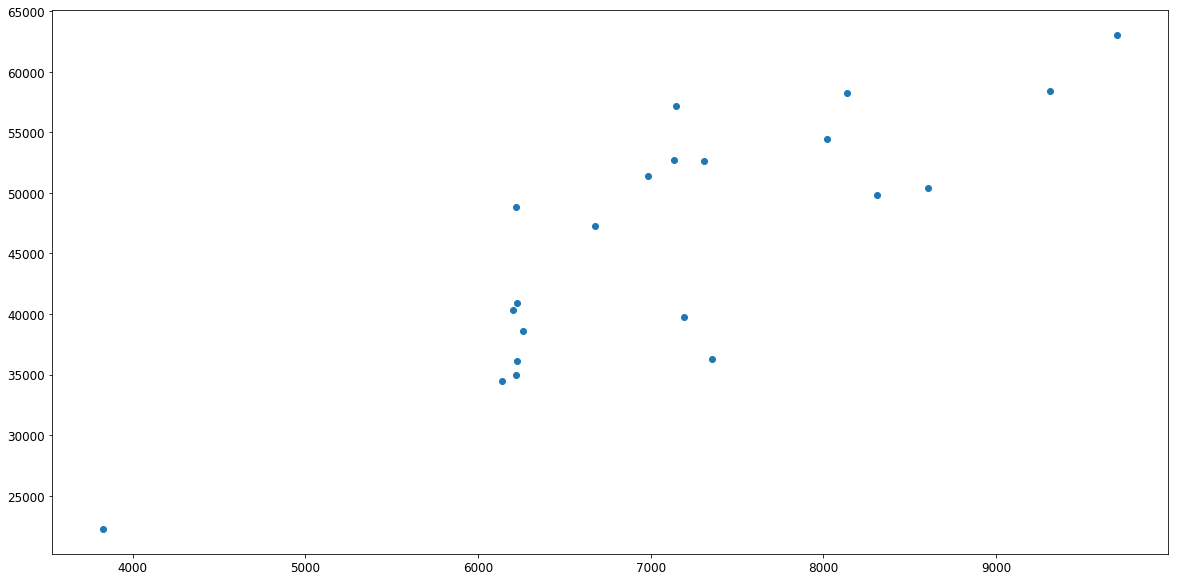

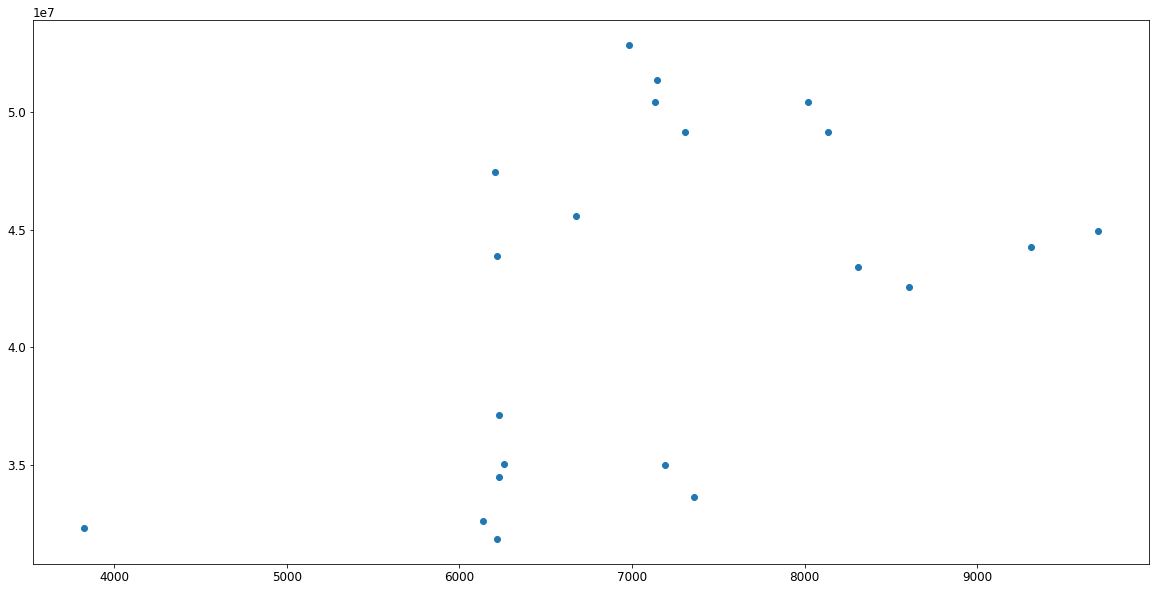

In [185]:
plt.scatter(x=shop_count_series.unique_items_sold,y=shop_count_series.units_sold)
plt.show()


plt.scatter(x=shop_count_series.unique_items_sold,y=shop_count_series.sales)

In [186]:
print(np.corrcoef(x=shop_count_series.unique_items_sold,y=shop_count_series.units_sold))
print(np.corrcoef(x=shop_count_series.unique_items_sold,y=shop_count_series.sales))

[[1.         0.82843635]
 [0.82843635 1.        ]]
[[1.         0.46196075]
 [0.46196075 1.        ]]


## Question 5 Conclusion: 

There is a correlation between unique items sold vs. total item units sold. However, there is not a correlation between unique items sold vs. total store sales. 